 Written by Federica B. Bianco @fedhere
 NYU CUSP PUI

 Assignment 1 Homework 4

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [5]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## choose which distributions to use 

In [6]:
np.random.seed(1000)

In [7]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['pois']


## and which mean to give it

In [8]:
mymean = 28

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](chisq1.png)

![2](chisq2.png)

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [9]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


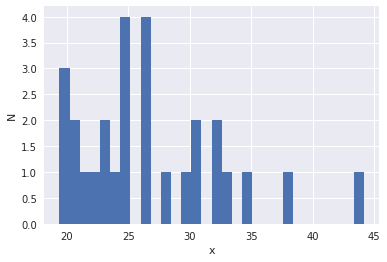

In [10]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

md = {}
# md is an empty disctionary
md['pois'] = np.random.chisquare(df, size=28)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

## let numpy calculate what the mean and stdev of this distribution are

In [11]:
print ("Pois mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Pois mean: 26.89, standard deviation: 5.79


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [12]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


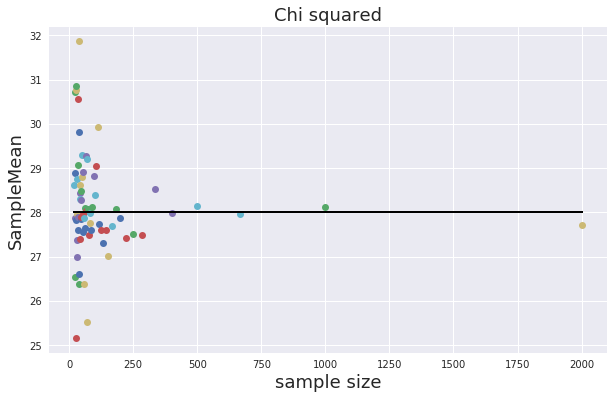

In [13]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['ChiSquared'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['ChiSquared'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['ChiSquared']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['ChiSquared']:
    if not type(nn) == str:
        md['ChiSquared']['means'][nn] = md['ChiSquared'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['ChiSquared']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('SampleMean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: [describe what you see and how it relates to the law of large numbers]

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


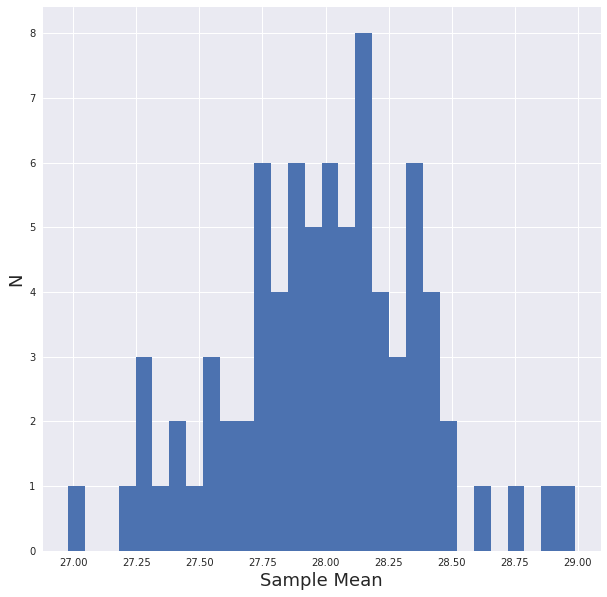

In [26]:
Cmeans = list(md['ChiSquared']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

#### Figure 3:
The skewed histogram right, indicating that the mean has some large values driving the mean upward. 


In [15]:
md['pois']

array([ 21.80642118,  29.77552906,  25.16910945,  30.31529858,
        31.97310827,  24.03965886,  19.40939956,  24.44031789,
        26.32260454,  32.89004761,  37.85612141,  20.66749103,
        30.45587564,  34.71008785,  23.46397513,  24.5972007 ,
        26.82428209,  27.95318603,  25.14348151,  44.15927645,
        26.75586804,  23.25163484,  20.33976846,  32.42989379,
        19.99874792,  26.03787626,  19.91337134,  22.20603473])

# Do it for the Normal distribution


In [16]:
mysize = (2000/np.array(range(1,200))).astype(int)
print ("Normal Distribution: %s Shape: %s"%(mysize, mysize.shape))

Normal Distribution: [2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20   19   19   19   19   19
   18   18   18   18   18   18   17   17   17   17   17   17   16   16   16
   16   16   16   16   16   15   15   15   15   15   15   15   15   14   14
   14   14   14   14   14   14   14   13   13   13   13   13   13   13   13
   13   13   13   12   12   12   12   12   12   12   12   12   12   12   12
   12   11   11   11   11   11   11   11   11   11   11   11   11   11   11
   11   10   10   10   10   10   10   10   10   10   10   10   10  

Text(0.5,1,'Normal Distribution Histogram')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


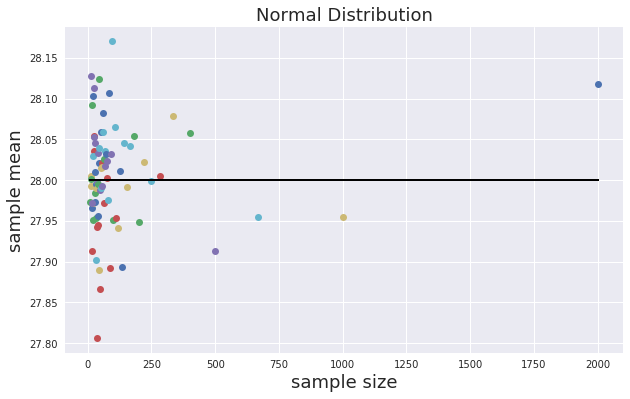

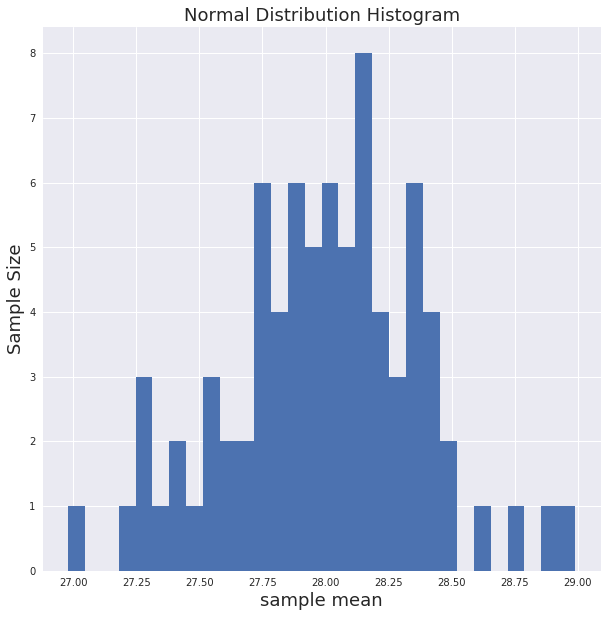

In [27]:
##your code here...
#Ploting Normal Distribution 
md['NormalDistribution'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['NormalDistribution'][n] = np.random.normal(28,1, size = 200)
    
# save the means for plotting later    

md['NormalDistribution']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['NormalDistribution']:
    if not type(nn) == str:
        md['NormalDistribution']['means'][nn] = md['NormalDistribution'][nn].mean()
#and plot it
        axchisq_mu_n.plot(nn, md['NormalDistribution']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Normal Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
        
# Plotting histogram
        
Nmeans = list(md['NormalDistribution']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('Sample Size', fontsize = 18)
pl.title('Normal Distribution Histogram', fontsize = 18)

### Figure 4: 
Based on the law of large numbers, the result of the analysis indicates, using a large sample-sized not far away from the mean. 


### Figure 4B: 
The skewed histogram right, according to the Central Limit Theorem, indicates the limited sample size. Nonetheless, the plot is very much like the Normal  Distribution as 




# Do it for the Poisson distribution

In [18]:
##your code here...
sizemd=(2000/np.array(range(1,200))).astype(int)
print (sizemd, sizemd.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20   19   19   19   19   19
   18   18   18   18   18   18   17   17   17   17   17   17   16   16   16
   16   16   16   16   16   15   15   15   15   15   15   15   15   14   14
   14   14   14   14   14   14   14   13   13   13   13   13   13   13   13
   13   13   13   12   12   12   12   12   12   12   12   12   12   12   12
   12   11   11   11   11   11   11   11   11   11   11   11   11   11   11
   11   10   10   10   10   10   10   10   10   10   10   10   10   10   10
   10   10  

Text(0.5,1,'poisson distribution Histogram')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


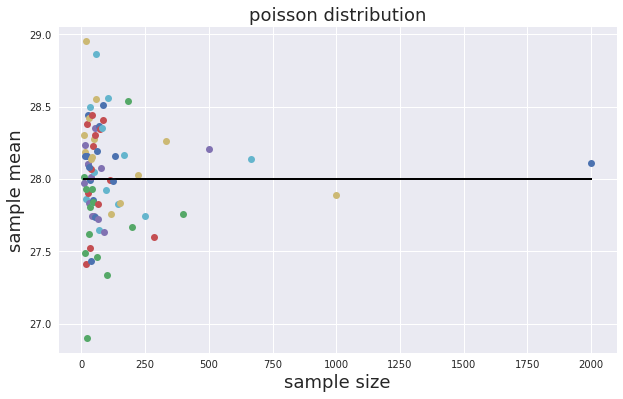

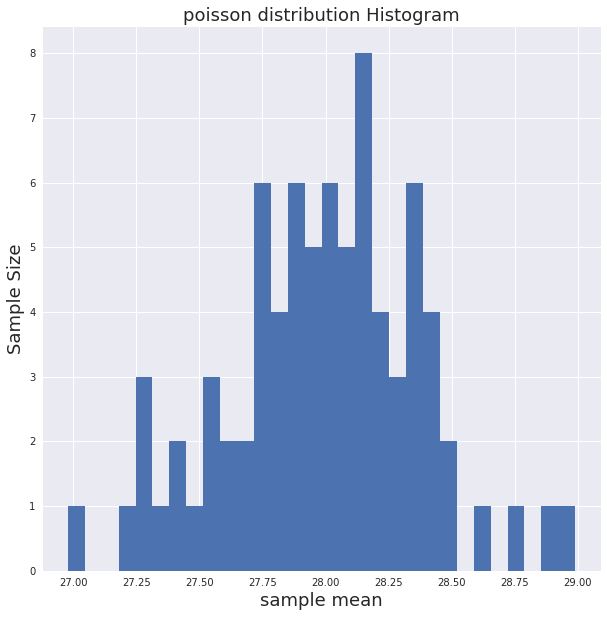

In [28]:
# Plot the poisson distribution 
md['poissondistribution'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['poissondistribution'][n] = np.random.poisson(28, size = 200)
    
# save the means for plotting later    

md['poissondistribution']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['poissondistribution']:
    if not type(nn) == str:
        md['poissondistribution']['means'][nn] = md['poissondistribution'][nn].mean()
#and plot it
        axchisq_mu_n.plot(nn, md['poissondistribution']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('poisson distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
        
# Plotting histogram
        
Pmeans = list(md['poissondistribution']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('Sample Size', fontsize = 18)
pl.title('poisson distribution Histogram', fontsize = 18)


## Figure 5A. 
Based on the law of large numbers, the result of the analysis indicates, using a large sample-sized not far away from the mean.


## Figure 5B.
The skewed histogram right, according to the Central Limit Theorem, indicates the limited sample size.


# Do it for the Binomial distribution

In [20]:
##your code here...
sizemd=(2000/np.array(range(1,100))).astype(int)
print (sizemd, sizemd.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


Text(0.5,1,'binomial distribution Histogram')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


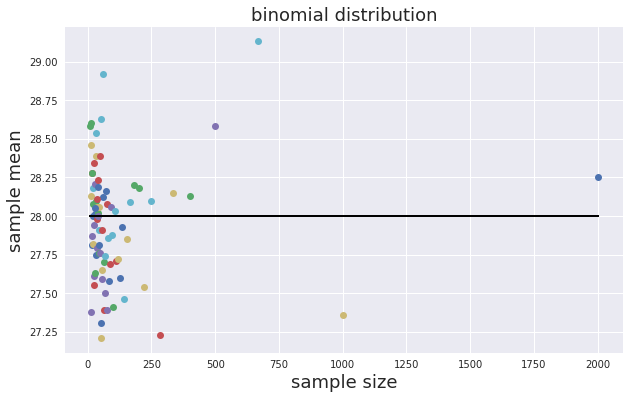

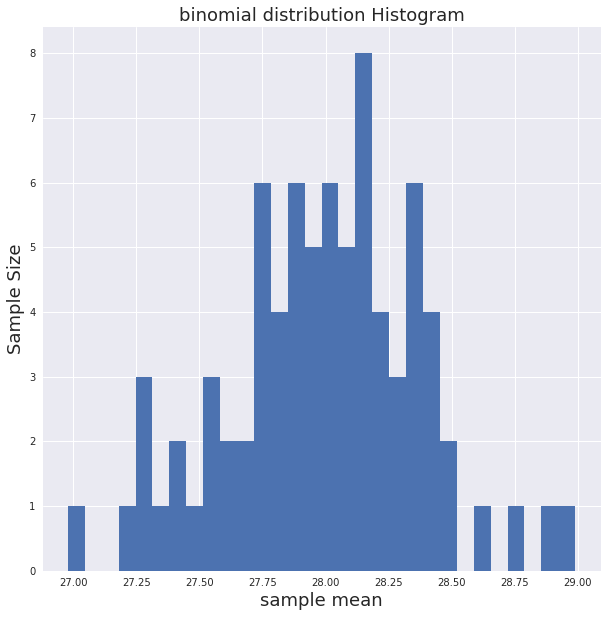

In [29]:
# Plot the binomial distribution 
md['binomialdistribution'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['binomialdistribution'][n] = np.random.binomial(56, 0.5, size = 100)
    
# save the means for plotting later    

md['binomialdistribution']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomialdistribution']:
    if not type(nn) == str:
        md['binomialdistribution']['means'][nn] = md['binomialdistribution'][nn].mean()
#and plot it
        axchisq_mu_n.plot(nn, md['binomialdistribution']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('binomial distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
        
# Plotting histogram
        
Bmeans = list(md['binomialdistribution']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('Sample Size', fontsize = 18)
pl.title('binomial distribution Histogram', fontsize = 18)











## Figure 6A.
Based on the law of large numbers, the result of the analysis indicates, using a large sample-sized not far away from the mean.



## Figure 6B. 
The skewed histogram right, according to the Central Limit Theorem, indicates the limited sample size.

# Do it for another distribution

In [22]:
##your code here...
sizemd=(2000/np.array(range(1,100))).astype(int)
print (sizemd, sizemd.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


Text(0.5,1,'Gamma distribution Histogram')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


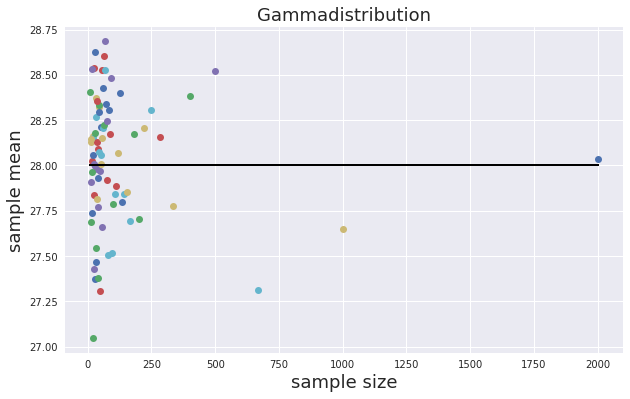

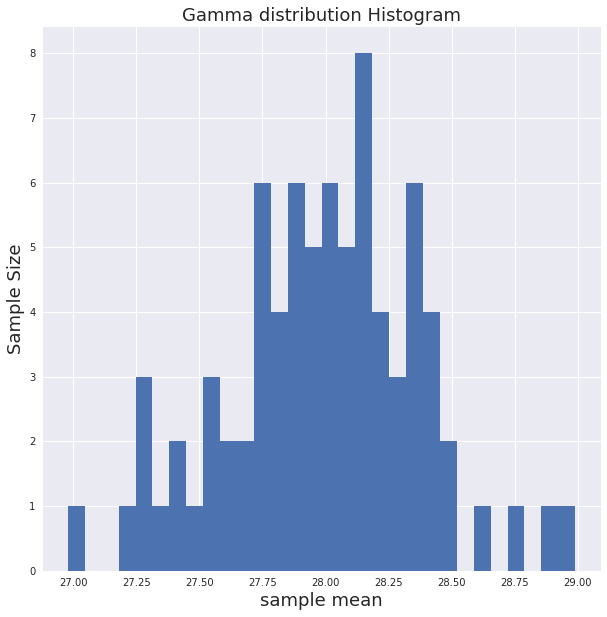

In [30]:
# Plot the binomial distribution 
md['Gammadistribution'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['Gammadistribution'][n] = np.random.gamma(56, 0.5, size = 100)
    
# save the means for plotting later    

md['Gammadistribution']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['Gammadistribution']:
    if not type(nn) == str:
        md['Gammadistribution']['means'][nn] = md['Gammadistribution'][nn].mean()
#and plot it
        axchisq_mu_n.plot(nn, md['Gammadistribution']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Gammadistribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
        
# Plotting histogram
        
Gmeans = list(md['Gammadistribution']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('Sample Size', fontsize = 18)
pl.title('Gamma distribution Histogram', fontsize = 18)


## Figure 7A.  
Based on the law of large numbers, the result of the analysis indicates, using a large sample-sized not far away from the mean.

## Figure 7B. 
The skewed histogram right, according to the Central Limit Theorem, indicates the limited sample size


## Histogram for All Distritbutions


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


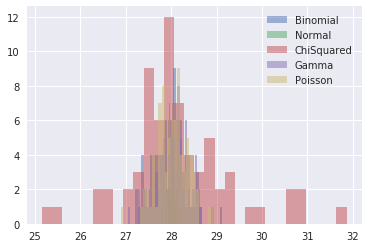

In [35]:
pl.hist(Bmeans,bins=30,alpha=0.5, label = 'Binomial')
pl.hist(Nmeans,bins=30, alpha=0.5, label = 'Normal')
pl.hist(Cmeans,bins=30, alpha=0.5, label = 'ChiSquared')
pl.hist(Gmeans,bins=30, alpha=0.5, label = 'Gamma')
pl.hist(Pmeans,bins=30, alpha=0.5, label ='Poisson')
pyplot.legend(loc = 'upper right')



## Figure 8. 
The graph indicates the five distributions methods within the one histogram. However, as shown in Figure 5A/B the chi-square distribution has a broader range compared to other distributions. Poisson is relatively a bit more skewed and less spread. Generally, the same means are more concentrated towards 28.0 which is the expected mean.